# numpy - 3

## Vectorizing function / iterating over ndarrays
numpy tries its best to understand how to apply functions to arrays, but needs help sometimes

In [2]:
import numpy as np

x = np.linspace(-1,1,11)
print(x)
print(abs(x))

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
[1.  0.8 0.6 0.4 0.2 0.  0.2 0.4 0.6 0.8 1. ]


In [4]:
def f(s):
    return s**2
print(f(x))


[1.   0.64 0.36 0.16 0.04 0.   0.04 0.16 0.36 0.64 1.  ]


Let's try to reimplement absolute value and apply this function to the `ndarray` `x`:

In [5]:
def myabs(x):
    if x < 0:
        return -x
    else:
        return x
print(myabs(1), myabs(-1))


1 1


In [6]:
print(myabs(x))


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

This fails because of the test `if x < 0`, which is ambiguous when `x` is an array. Technically, we don't want to apply this test to `x` but to each element of `x`.

We could rewrite this function to go through all items in `x`. 

In [9]:
def myabs2(x):
    absx = np.empty(x.shape)
    for i,xx in enumerate(x):
        print(i, xx)
        
        if xx < 0:
            absx[i] = -xx
        else:
            absx[i] = xx
    return absx
print (myabs2(x))


0 -1.0
1 -0.8
2 -0.6
3 -0.3999999999999999
4 -0.19999999999999996
5 0.0
6 0.20000000000000018
7 0.40000000000000013
8 0.6000000000000001
9 0.8
10 1.0
[1.  0.8 0.6 0.4 0.2 0.  0.2 0.4 0.6 0.8 1. ]


In [10]:
y = np.array([[1,-1,1,1],
              [2,3,-4,5]])
myabs2(y)



0 [ 1 -1  1  1]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

This fails again. why?

In [13]:
def myabs3(x):
    absx = np.empty(x.shape)
    for i,xx in np.ndenumerate(x):
        # print(i, xx)
        
        if xx < 0:
            absx[i] = -xx
        else:
            absx[i] = xx
    return absx
    

In [14]:
print (myabs3(x))


[1.  0.8 0.6 0.4 0.2 0.  0.2 0.4 0.6 0.8 1. ]


In [20]:
print (myabs3(y))
print(myabs3(np.array([-1])))

      



[[1. 1. 1. 1.]
 [2. 3. 4. 5.]]
[1.]


`np.ndenumerate` generalized enumerate where the indices become 'multi-indices'

Python is able to convert a regular function into a vectorized one (i.e. make sure the function is applied to all entries in a ndarray.
It is the `np.vectorize` method:

In [21]:
myabsVect = np.vectorize(myabs)
print(y)
print(myabsVect(y))


[[ 1 -1  1  1]
 [ 2  3 -4  5]]
[[1 1 1 1]
 [2 3 4 5]]


## Random numbers

In [26]:
# Create a random number generator
rng = np.random.default_rng()

# generate random numbers using a uniform distribution
for i in range(10):
    print(rng.uniform(low = -1, high = 1, size=2))
# dir(rng)



[0.05404519 0.89618317]
[ 0.09984579 -0.50852185]
[-0.95438    -0.55628304]
[-0.16521243  0.06483277]
[-0.16005291  0.95150332]
[-0.19976141  0.25837   ]
[0.25513345 0.96680745]
[-0.30458899  0.35806401]
[0.4089704  0.37999837]
[ 0.5751667  -0.53390727]


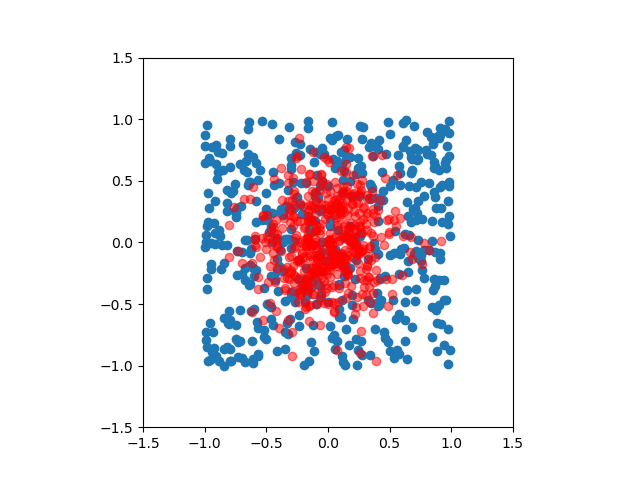

In [27]:
%matplotlib widget
import matplotlib.pyplot as plt
n = 501
fig, ax = plt.subplots(1,1)
Xu = rng.uniform(low=-1, high=1, size=n)
Yu = rng.uniform(low=-1, high=1, size=n)
ax.scatter(Xu, Yu, marker = 'o')
Xn = rng.normal(loc=0, scale = 0.3, size=n)
Yn = rng.normal(loc=0, scale = 0.3, size=n)
ax.scatter(Xn, Yn, marker = 'o', color = 'red', alpha = 0.5)
ax.axis([-1.5,1.5,-1.5,1.5])
ax.set_aspect('equal', 'box')


## Application: computing $\pi$ using the Monte Carlo method

In [ ]:
n = 100000


import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig, ax = plt.subplots()
plt.plot([np.cos(theta) for theta in np.linspace(0,2*np.pi,101)],[np.sin(theta) for theta in np.linspace(0,2*np.pi,101)], linewidth=2, color='red')

X = rng.uniform(low=-1, high=1, size = n)
Y = rng.uniform(low=-1, high=1, size = n)
C = np.empty(n)
nin = 0
for i in range(n):
    if X[i]**2 + Y[i]**2 <= 1:
        C[i] = 0
        nin += 1
    else:
        C[i] = 1
ax.scatter(X, Y, c=C, cmap = 'bwr', marker = '.')
ax.axis([-1,1,-1,1])
ax.set_aspect('equal', 'box')




print(f"number of points inside the circle: {nin}")
print(f"probability that a point is inside the circle (estimated): {nin/n*4:f}")

In [ ]:
def f(x):
    return x**2

# compute int_0^1 f(x)dx
n = 1000000
X = rng.uniform(low=0, high=1, size = n)
Y = rng.uniform(low=0, high=1, size = n)

nbelow = 0
for i in range(n):
    if Y[i] <= f(X
        [i]):
        nbelow += 1

print(nbelow / n)


